In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns


df=pd.read_csv('../data/ds_salaries.csv')

#Vemos las primeras filas del dataframe
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [9]:
#Observamos la informacion general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
#Observamos las caracteristicas
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [11]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [12]:
#Se verifican los valores duplicados

df.duplicated().sum()

1171

In [13]:
#Eliminacion de valores duplicados y posterior verificacion

df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [14]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [15]:
#Eliminamos la columnsa SALARY para mejor visualizacion de los datos, ya que tiene su equivalente en USD 

df = df.drop(['salary', 'salary_currency'], axis=1)
df.columns


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [16]:
#Exploracion de categorias

print('Experience level: ', df['experience_level'].unique())
print('Employment type: ', df['employment_type'].unique())
print('Employee residence: ', df['employee_residence'].unique())
print('Company location: ', df['company_location'].unique())
print('Company size: ', df['company_size'].unique())

Experience level:  ['SE' 'MI' 'EN' 'EX']
Employment type:  ['FT' 'CT' 'FL' 'PT']
Employee residence:  ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']
Company location:  ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
Company size:  ['L' 'S' 'M']


In [50]:
#Generamos un diccionario en donde las categorias son mas legibles, para ellos realizamos una copia del dataframe para no afectar
#al principal

experience_level_map = {
    'SE': 'Senior',
    'MI': 'Middle',
    'EN': 'Junior',
    'EX': 'Executive'
}

employment_type_map = {
    'FT': 'Full Time',
    'CT': 'Contract',
    'FL': 'Freelance',
    'PT': 'Part Time'
}

remote_ratio_map = {
    0: 'Not Remote',
    50: 'Half Remote',
    100: 'Full Remote'
}

company_size_map = {
    'L': 'Large',
    'S': 'Small',
    'M': 'Medium'
}
df1 = df.copy()
df1['experience_level'] = df1['experience_level'].map(experience_level_map)
df1['employment_type'] = df1['employment_type'].map(employment_type_map)
df1['company_size'] = df1['company_size'].map(company_size_map)
df1['remote_ratio'] = df1['remote_ratio'].map(remote_ratio_map)
df1.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2211,2022,Senior,Full Time,Data Scientist,140000,USD,140000,US,Not Remote,US,Medium
1941,2022,Senior,Full Time,Data Engineer,35000,EUR,36773,ES,Not Remote,ES,Medium
3387,2022,Senior,Full Time,Data Engineer,25000,USD,25000,US,Full Remote,US,Medium
1279,2023,Junior,Full Time,Data Analyst,55000,USD,55000,US,Not Remote,US,Medium
3721,2020,Senior,Freelance,Computer Vision Engineer,60000,USD,60000,RU,Full Remote,US,Small


In [18]:
df1.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [20]:
stats_summary = df.describe()
print(stats_summary)

         work_year  salary_in_usd  remote_ratio
count  2584.000000    2584.000000   2584.000000
mean   2022.301084  133409.280186     50.483746
std       0.749179   67136.837329     48.163707
min    2020.000000    5132.000000      0.000000
25%    2022.000000   84975.000000      0.000000
50%    2022.000000  130000.000000     50.000000
75%    2023.000000  175000.000000    100.000000
max    2023.000000  450000.000000    100.000000


In [36]:
print(df['salary_in_usd'].describe())  # Resumen de la columna de salarios
print(df['work_year'].describe())  # Resumen de la columna de años de trabajo


count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64
count    3755.000000
mean     2022.373635
std         0.691448
min      2020.000000
25%      2022.000000
50%      2022.000000
75%      2023.000000
max      2023.000000
Name: work_year, dtype: float64


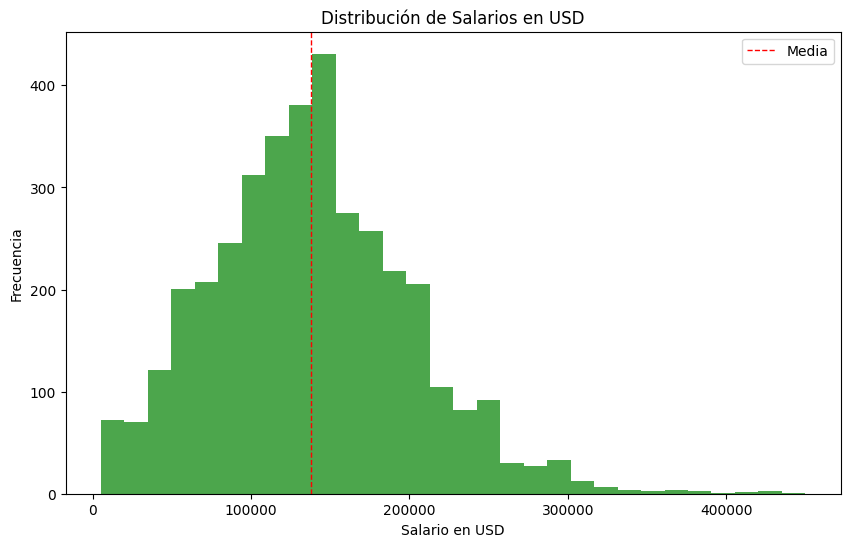

In [54]:
# Histograma de salarios en USD
#Se puede observar si hay una concentración en un rango específico de salarios.

plt.figure(figsize=(10, 6))
plt.hist(df['salary_in_usd'].dropna(), bins=30, color='green', alpha=0.7)
plt.title('Distribución de Salarios en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.axvline(x=df['salary_in_usd'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media')
plt.legend()
plt.show()


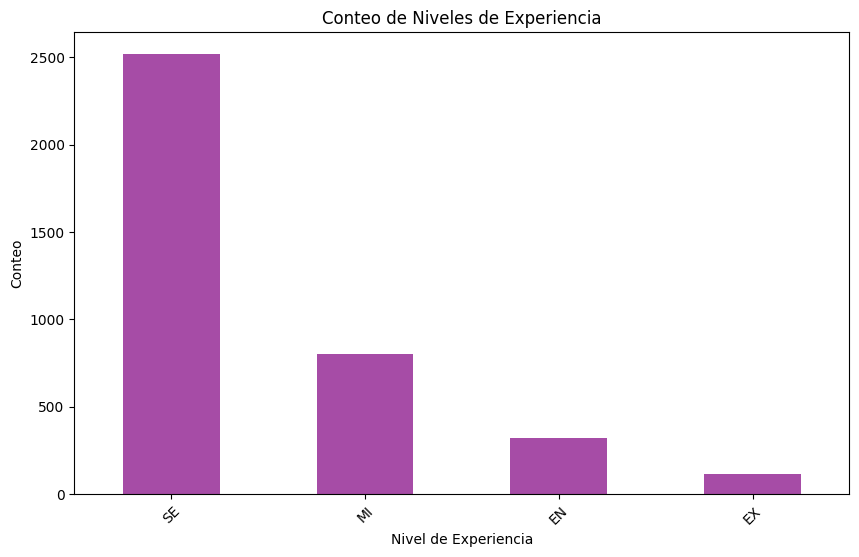

In [53]:
#Numero de empleados por nivel de exp
experience_counts = df['experience_level'].value_counts()
    
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Conteo de Niveles de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.show()



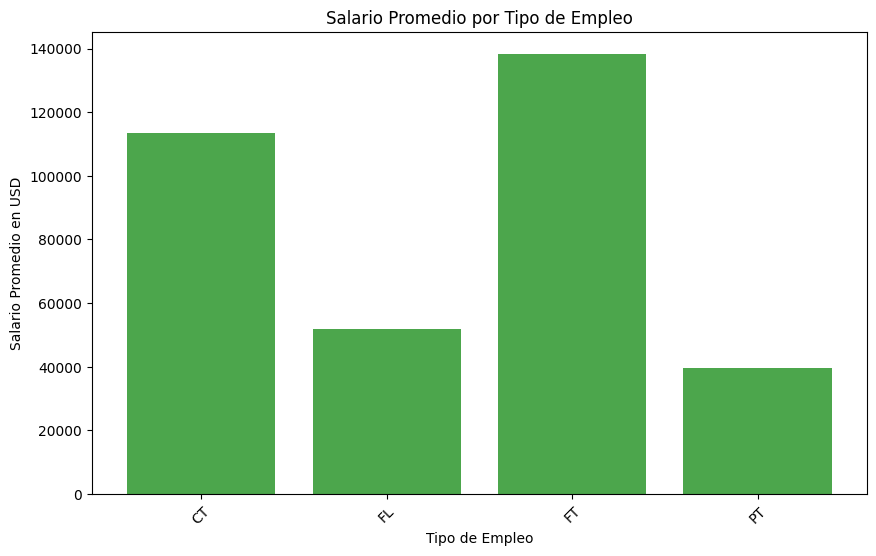

In [42]:
# Salario promedio por tipo de empleo
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_salary_by_employment['employment_type'], avg_salary_by_employment['salary_in_usd'], color='green', alpha=0.7)
plt.title('Salario Promedio por Tipo de Empleo')
plt.xlabel('Tipo de Empleo')
plt.ylabel('Salario Promedio en USD')
plt.xticks(rotation=45)
plt.show()


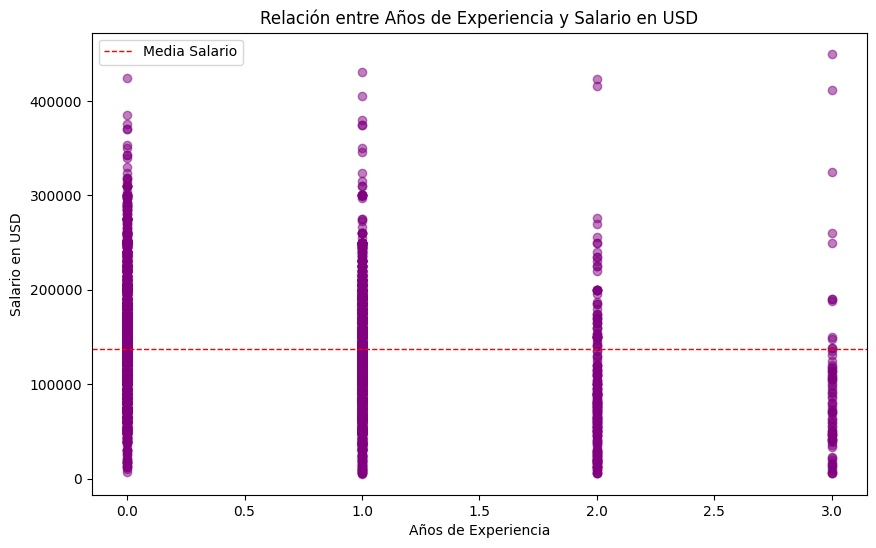

In [55]:
#Relación entre los años de experiencia y el salario en USD
df['years_of_experience'] = 2023 - df['work_year']

plt.figure(figsize=(10, 6))
plt.scatter(df['years_of_experience'], df['salary_in_usd'], alpha=0.5, color='purple')
plt.title('Relación entre Años de Experiencia y Salario en USD')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario en USD')
plt.axhline(y=df['salary_in_usd'].mean(), color='red', linestyle='dashed', linewidth=1, label='Media Salario')
plt.legend()
plt.show()


In [59]:
df.describe(include=np.number)


,work_year,salary,salary_in_usd,remote_ratio,years_of_experience
count,3755.000000,3.755000e+03,3755.000000,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638,0.626365
std,0.691448,6.716765e+05,63055.625278,48.589050,0.691448
min,2020.000000,6.000000e+03,5132.000000,0.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000,1.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000,1.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000,3.000000


In [61]:
df.describe(include = object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [62]:
counts=df['job_title'].value_counts().head(20)
counts

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Computer Vision Engineer        18
AI Scientist                    16
BI Data Analyst                 15
Business Data Analyst           15
Data Specialist                 14
Name: count, dtype: int64

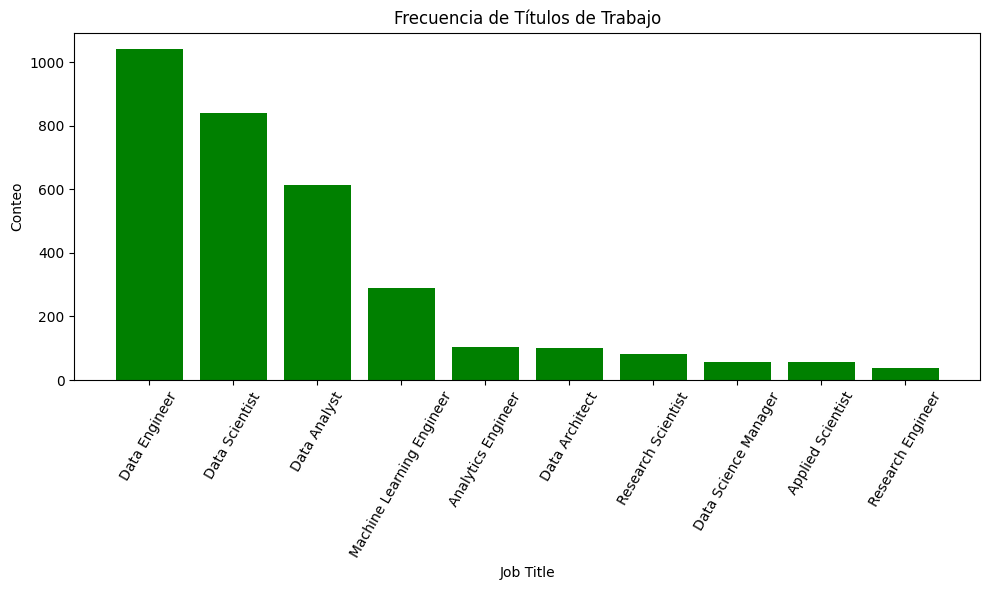

In [67]:
job_title_counts = df['job_title'].value_counts()


plt.figure(figsize=(10, 6))
plt.bar(job_title_counts.index[:10], job_title_counts.values[:10], color='green')
plt.xlabel('Job Title')
plt.title('Frecuencia de Títulos de Trabajo')
plt.ylabel('Conteo')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

Análisis adicional:

1. La distribución sugiere que, aunque existen salarios muy altos, la mayoría de los profesionales de ciencia de datos ganan sueldos en un rango más moderado. Las posibles diferencias regionales o de experiencia podrían explicar las discrepancias.
2. Un aumento general de la suma de salarios indicaría un crecimiento en el mercado laboral de ciencia de datos, mientras que una caída podría requerir una investigación más profunda.
3. La demanda de profesionales experimentados parece ser más alta, lo que puede implicar que los salarios para personas con menos experiencia están más restringidos o que las oportunidades de entrada en la ciencia de datos son más difíciles de conseguir.
4. A partir de las estadísticas categóricas, la mayoría de los empleos están clasificados como Full-Time. Esto sugiere que los empleadores prefieren contratar a tiempo completo en vez de contratistas o freelancers.
5. Las diferencias regionales en los salarios podrían estar vinculadas con la ubicación de la empresa o el empleado, y la prevalencia del trabajo remoto podría indicar una creciente flexibilidad en las empresas para contratar talento global.

Este tipo de análisis nos permite entender mejor el mercado laboral de la ciencia de datos y detectar áreas donde podría haber oportunidades de mejora o investigación adicional.



Utilice dos recursos de KAGGLE,(https://www.kaggle.com/code/ahmedessamsaber/data-science-salaries-2023),
https://www.kaggle.com/code/georgehanyfouad/analysis-on-data-science-salaries-2023/notebook